## Refs 

https://www.tensorflow.org/install

https://www.tensorflow.org/tutorials/keras/classification
    

In [77]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [126]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(x_train.shape)


(60000, 28, 28, 1)


In [118]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_42 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_81 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [119]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.2377 - accuracy: 0.9278 - val_loss: 0.1271 - val_accuracy: 0.9618
Epoch 2/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.0989 - accuracy: 0.9700 - val_loss: 0.0976 - val_accuracy: 0.9718
Epoch 3/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.1013 - val_accuracy: 0.9702
Epoch 4/10
48000/48000 [==============================] - 3s 57us/sample - loss: 0.0521 - accuracy: 0.9835 - val_loss: 0.0906 - val_accuracy: 0.9765
Epoch 5/10
48000/48000 [==============================] - 3s 57us/sample - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0968 - val_accuracy: 0.9758
Epoch 6/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0988 - val_accuracy: 0.9747
Epoch 7/10
48000/48000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


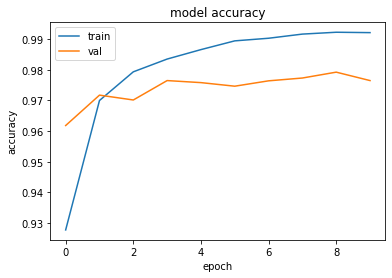

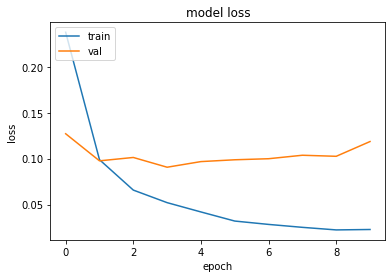

In [120]:
show_history(history)


In [121]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0517 - accuracy: 0.9776


[0.10330733150941396, 0.9776]

In [142]:
modelConv = tf.keras.models.Sequential()
modelConv.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
modelConv.add(tf.keras.layers.Conv2D(16, (3, 3)))
modelConv.add(tf.keras.layers.Flatten())
modelConv.add(tf.keras.layers.Dense(32, activation='relu'))
modelConv.add(tf.keras.layers.Dense(10, activation='softmax'))


modelConv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(modelConv.summary())

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_44 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                294944    
_________________________________________________________________
dense_86 (Dense)             (None, 10)                330       
Total params: 297,754
Trainable params: 297,754
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

history = modelConv.fit(x_train, y_train, 
                        batch_size=32, 
                        epochs=10, 
                        callbacks=[checkpointer],
                        validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47520/48000 [============================>.] - ETA: 0s - loss: 0.1948 - accuracy: 0.9414
Epoch 00001: val_accuracy improved from -inf to 0.97733, saving model to best_weights.hdf5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.1936 - accuracy: 0.9417 - val_loss: 0.0790 - val_accuracy: 0.9773
Epoch 2/10
47264/48000 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9792
Epoch 00002: val_accuracy did not improve from 0.97733
48000/48000 [==============================] - 3s 72us/sample - loss: 0.0681 - accuracy: 0.9792 - val_loss: 0.0744 - val_accuracy: 0.9768
Epoch 3/10
47616/48000 [============================>.] - ETA: 0s - loss: 0.0475 - accuracy: 0.9852
Epoch 00003: val_accuracy improved from 0.97733 to 0.98058, saving model to best_weights.hdf5
48000/48000 [==============================] - 3s 72us/sample - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0632 - val_accuracy: 0.9

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


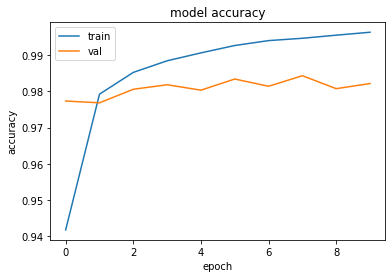

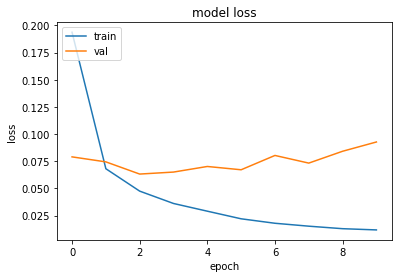

In [144]:
show_history(history)

In [145]:
modelConv.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0444 - accuracy: 0.9815


[0.0887419264555765, 0.9815]

In [146]:
layer_outputs = [layer.output for layer in modelConv.layers[:2]] # Extracts the outputs of the top 12 layers
activation_model = tf.keras.models.Model(inputs=modelConv.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [147]:
activations = activation_model.predict(x_test[:1])
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 16)


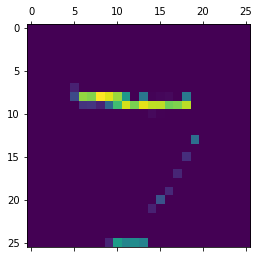

In [148]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Ref: https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

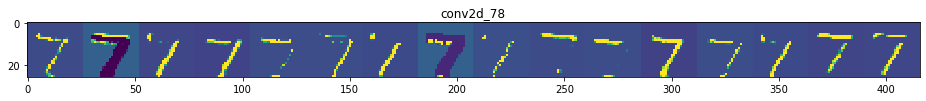

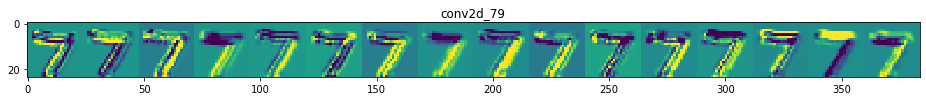

In [149]:
layer_names = []
for layer in modelConv.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
